In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
first_angle = cv2.imread('../drawings/10031-plan-0.jpg')
firstgray = cv2.cvtColor(first_angle, cv2.COLOR_BGR2GRAY)
outlines = first_angle.copy()

True

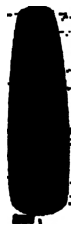

In [7]:
img = cv2.fastNlMeansDenoising(firstgray,None, 1, 7, 21)

clahe = cv2.createCLAHE(clipLimit=1, tileGridSize=(10,10))
cl1 = clahe.apply(img)

thresh, prof_thresh = cv2.threshold(cl1, 250, 255, cv2.THRESH_BINARY_INV)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8,8))
dilated = cv2.dilate(prof_thresh, kernel, iterations=2)

contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 4) & (area > 60) ):
        contour_list.append(contour)

outlines_copy = outlines.copy()
        
cv2.drawContours(outlines_copy, contour_list, -1, (0,0,0), thickness=cv2.FILLED)

plt.imshow(outlines_copy)
plt.rcParams["figure.figsize"] = (10,10)
plt.axis('off')

cv2.imwrite("../figure/10031-filled-contours.jpg", outlines_copy)

True

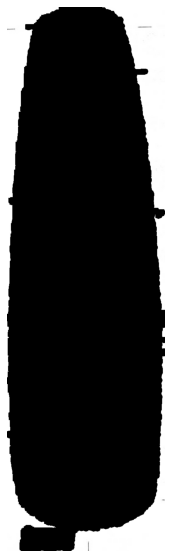

In [9]:
maxcont = max(contours, key = cv2.contourArea)
x,y,w,h = cv2.boundingRect(maxcont)

other_cont = []

for cont in contours:
    if cv2.contourArea(cont) < cv2.contourArea(maxcont):
        other_cont.append(cont)
        
large_cont = []

for cont in contours:
    if cv2.contourArea(cont) >= cv2.contourArea(maxcont):
        large_cont.append(cont)
        
outlines4 = first_angle.copy()

cv2.drawContours(outlines4, large_cont, -1, (0,0,0), thickness=cv2.FILLED)

plt.imshow(outlines4, cmap="gray")
plt.rcParams["figure.figsize"] = (10,10)
plt.axis('off')

cv2.imwrite("../figure/10031-largest-contour.jpg", outlines4)

(-0.5, 442.5, 1524.5, -0.5)

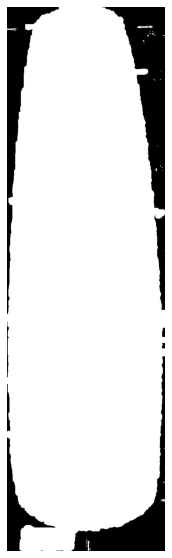

In [11]:
thresh, outlines_thresh = cv2.threshold(outlines4, 250, 255, cv2.THRESH_BINARY_INV)

plt.imshow(outlines_thresh, cmap="gray")
plt.rcParams["figure.figsize"] = (10,10)
plt.axis('off')

removing contours from image: https://www.pyimagesearch.com/2015/02/09/removing-contours-image-using-python-opencv/
<br/>
eliminating small contours: https://answers.opencv.org/question/223216/python-eliminate-small-contours/ <br/>
eliminating small contours attached to large one: https://stackoverflow.com/questions/57561113/how-to-remove-small-contours-attached-to-another-big-one <br/>

True

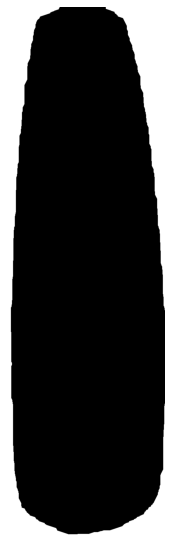

In [14]:
closing = cv2.morphologyEx(outlines_thresh, cv2.MORPH_OPEN, kernel, iterations=10)

#cv2.imwrite("test.jpg", closing)

silhouette = cv2.bitwise_not(closing)

plt.imshow(silhouette, cmap="gray")
plt.rcParams["figure.figsize"] = (10,10)
plt.axis('off')

cv2.imwrite("../figure/10031-final-fill.jpg", silhouette)